Найти ключевые показатели экономики страны
Выявить аномалии данных
Создать модель предсказания уровня ВВП по иным показателям


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Елисей\\Downloads\\PetProject.csv", delimiter=";")

In [3]:
df.set_index('Years', inplace=True)

In [4]:
df.describe()

,"Gross domestic product, deflator","Gross domestic product per capita, constant prices. National currency (Units)","Inflation, average consumer prices",Volume of imports of goods and services %,Volume of exports of goods and services %,Unemployment rate %,Employment. Persons (Millions),General government revenue. National currency (Millions),General government total expenditure. National currency (Millions),General government net debt. National currency (Millions)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,25.000000
mean,79.224525,293230.763750,75.616850,4.201550,4.411250,6.184925,2.662275,706.700300,708.559100,387.038080
std,20.224987,48674.282241,19.673026,4.967497,3.661373,1.462263,0.106375,303.723439,290.291356,128.017997
min,38.247000,203201.061000,34.775000,-11.944000,-9.224000,3.717000,2.414000,195.457000,209.858000,141.266000
25%,65.972750,250082.028000,63.181000,2.274750,3.100500,5.031500,2.630500,454.772750,466.011750,279.218000
50%,77.956500,309454.993500,76.454500,4.107000,4.234500,6.145500,2.667500,705.990000,688.074500,358.124000
75%,97.656500,331204.923000,92.614250,7.036500,6.070000,7.431750,2.726250,968.291500,986.804500,514.327000
max,108.408000,370973.123000,102.533000,13.965000,12.578000,9.533000,2.879000,1238.147000,1149.867000,564.162000


In [5]:
df = df.rename(columns={'Gross domestic product, deflator': 'Deflator',
       'Gross domestic product per capita, constant prices. National currency (Units)': 'GDP_per_capita',
       'Inflation, average consumer prices': 'Inflation',
       'Volume of imports of goods and services %': 'Import',
       'Volume of exports of goods and services %': 'Export',
       'Unemployment rate %': 'Unemployment',
       'Employment. Persons (Millions)': 'Employment',
       'General government revenue. National currency (Millions)': 'Revenue',
       'General government total expenditure. National currency (Millions)': 'Expenditure',
       'General government net debt. National currency (Millions)': 'Debt'})

In [6]:
#checking the data for normal distribution by coefficient of variation. 
#The whole data should be greater than zero. 
#If cv < 33% distribution is probably normal.

colum = []
neg_column = []
for col in df.columns:
    if df[col].min() > 0:
        colum.append(col)
    else:
        neg_column.append(col)
print('Columns where we can calculate coefficient of Variation:')
print()
print(*colum, sep='\n')
print()
print('Columns where we cannot calculate coefficient of Variation:')
print()
print(*neg_column, sep='\n')

Columns where we can calculate coefficient of Variation:

Deflator
GDP_per_capita
Inflation
Unemployment
Employment
Revenue
Expenditure
Debt

Columns where we cannot calculate coefficient of Variation:

Import
Export


In [7]:
cv = df[colum].apply(lambda x: np.std(x, ddof=1) / np.mean(x) * 100).sort_values(ascending=False)

In [8]:
cv

Revenue           42.977686
Expenditure       40.969251
Debt              33.076331
Inflation         26.016722
Deflator          25.528694
Unemployment      23.642380
GDP_per_capita    16.599310
Employment         3.995652
dtype: float64

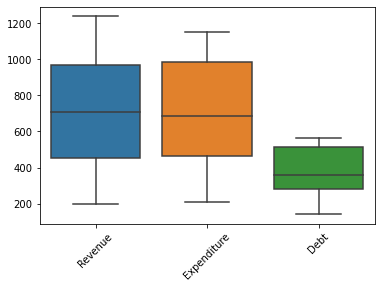

In [9]:
#visual check for outlier

sns.boxplot(data=df[['Revenue',
                     'Expenditure',
                     'Debt'
                    ]])
plt.xticks(rotation=45)
plt.show()

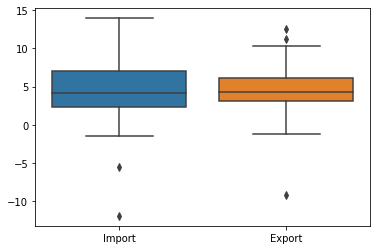

In [10]:
# visual check for outlier where data has negetive items

sns.boxplot(data=df[['Import', 'Export']])
plt.show()

In [11]:
df[['Import', 'Export']]

,Import,Export
Years,,
1980,-5.564,5.580
1981,0.555,8.661
1982,3.137,3.165
1983,1.971,4.596
1984,5.362,3.298
1985,9.930,6.037
1986,8.479,1.339
1987,-1.178,4.857
1988,4.224,9.142


In [12]:
# we're going to change 2009 indicators on averedge in order to decrease variety and keep the original state of affairs
df.loc[2009, 'Import'] = np.mean(df['Import'])
df.loc[2009, 'Export'] = np.mean(df['Export'])


In [13]:
df.describe()

,Deflator,GDP_per_capita,Inflation,Import,Export,Unemployment,Employment,Revenue,Expenditure,Debt
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,25.000000
mean,79.224525,293230.763750,75.616850,4.605189,4.752131,6.184925,2.662275,706.700300,708.559100,387.038080
std,20.224987,48674.282241,19.673026,4.221949,2.918783,1.462263,0.106375,303.723439,290.291356,128.017997
min,38.247000,203201.061000,34.775000,-5.564000,-1.202000,3.717000,2.414000,195.457000,209.858000,141.266000
25%,65.972750,250082.028000,63.181000,2.390250,3.156000,5.031500,2.630500,454.772750,466.011750,279.218000
50%,77.956500,309454.993500,76.454500,4.192275,4.384625,6.145500,2.667500,705.990000,688.074500,358.124000
75%,97.656500,331204.923000,92.614250,7.036500,6.070000,7.431750,2.726250,968.291500,986.804500,514.327000
max,108.408000,370973.123000,102.533000,13.965000,12.578000,9.533000,2.879000,1238.147000,1149.867000,564.162000


In [14]:
# Looking for NaN
df.isnull().sum()

Deflator           0
GDP_per_capita     0
Inflation          0
Import             0
Export             0
Unemployment       0
Employment         0
Revenue            0
Expenditure        0
Debt              15
dtype: int64

https://www.ceicdata.com/en/denmark/esa-1995-central-government-debt/central-government-debt-gross-foreign

In [15]:
df = df.fillna(0)

In [16]:
df.isnull().sum()

Deflator          0
GDP_per_capita    0
Inflation         0
Import            0
Export            0
Unemployment      0
Employment        0
Revenue           0
Expenditure       0
Debt              0
dtype: int64

In [17]:
# Check for normal distribution by Shapiro–Wilk test

import scipy

norm_dist = {}
not_norm_dist = {}

for col in df.columns:
    stat, p = scipy.stats.shapiro(df[col]) 
    
    alpha = 0.05
    
    if p > alpha:
        norm_dist[col] = round(p, 3)
    else:
        not_norm_dist[col] = round(p, 3)
print('For NORMAL DISTRIBUTION:')
print()
print(*norm_dist.items(), sep='\n')          
        
print()

print('For NOT NORMAL DISTRIBUTION:')
print()
print(*not_norm_dist.items(), sep='\n')  

For NORMAL DISTRIBUTION:

('Deflator', 0.099)
('Inflation', 0.06)
('Import', 0.374)
('Export', 0.08)
('Unemployment', 0.309)
('Employment', 0.435)
('Revenue', 0.102)

For NOT NORMAL DISTRIBUTION:

('GDP_per_capita', 0.021)
('Expenditure', 0.037)
('Debt', 0.0)


## Intaraction of indicators

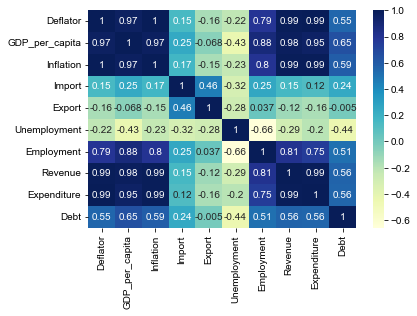

In [18]:
#Looking at general intaraction of indicators

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize': (15,8)})
plt.show()

In [19]:
#Calculate VIF to avoid multicollinearity

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

c = list(df.columns)
c.remove('GDP_per_capita')
explanatory_variables = '+'.join(c)

#find design matrix for linear regression model using 'GDP_per_capita' as response variable 
y, X = dmatrices(f'GDP_per_capita ~ {explanatory_variables}', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif.drop(labels=[0], axis=0, inplace=True)

while vif.VIF.max() > 5:
    vif.drop(labels=vif.loc[vif.VIF == vif.VIF.max()].index, axis=0, inplace=True)
    c = vif.variable.values
    explanatory_variables = '+'.join(c)
    y, X = dmatrices(f'GDP_per_capita ~ {explanatory_variables}', data=df, return_type='dataframe')
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['variable'] = X.columns
    vif.drop(labels=[0], axis=0, inplace=True)
    





In [20]:
vif

,VIF,variable
1,1.401325,Import
2,1.421889,Export
3,1.409888,Unemployment
4,1.523540,Revenue
5,1.694164,Debt


In [21]:
important_variables = list(vif.variable.values)

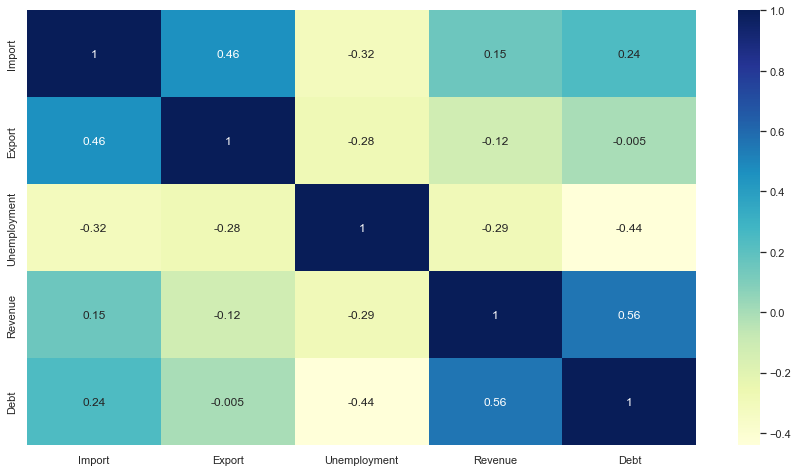

In [22]:
#Predictors for regression model where main variable is "GDP_per_capita"

sns.heatmap(df[important_variables].corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize': (14,9)})
plt.show()

In [23]:
X, y = df[important_variables], df.GDP_per_capita

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [25]:
#determining the optimal model
models = [LinearRegression(), 
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), 
          KNeighborsRegressor(n_neighbors=6), 
          SVR(kernel='linear') 
         ]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)

In [27]:
TestModels = pd.DataFrame()
tmp = {}

for model in models:
    m = str(model)
    tmp['Model'] = m 
    
    model.fit(X_train, Y_train) 

    tmp['R2_score'] = r2_score(Y_test, model.predict(X_test))
    
    df_tmp = pd.DataFrame([tmp])
    TestModels = pd.concat([TestModels, df_tmp])

TestModels.set_index('Model', inplace=True)

In [28]:
TestModels

,R2_score
Model,
LinearRegression(),0.977917
RandomForestRegressor(max_features='sqrt'),0.920697
KNeighborsRegressor(n_neighbors=6),0.937974
SVR(kernel='linear'),0.980312


In [29]:
x = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         GDP_per_capita   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              685.5
Date:                Tue, 16 Aug 2022   Prob (F-statistic):                    7.27e-34
Time:                        15:06:09   Log-Likelihood:                         -468.95
No. Observations:                  40   AIC:                                      947.9
Df Residuals:                      35   BIC:                                      956.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------